# Minería de Datos - Proyecto 2 #

## Integrantes:

- **Integrante 1**: Sebastián Dahma
- **Integrante 2**: Javier Montes
- **Integrante 3**: Camila Retamales

Importamos las liberias necesarias:

In [ ]:
import numpy as np
import pandas as pd
from plotnine import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sympy import Matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import statistics
import statsmodels.api as sm 
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score)
import seaborn as sns
from sklearn import datasets
import plotly.graph_objects as go
from sklearn.metrics import roc_curve
from sklearn import metrics as mt
from sklearn.metrics import roc_auc_score

In [ ]:
vuelos = pd.read_csv("ALUMNOS-trainData.csv")

# Análisis Exploratorio

In [ ]:
vuelos.head()

,Unnamed: 0,date,fligth_number,origin,destination,distance,noshow,denied_boarding,pax_midlow,pax_high,...,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,departure_time,capacity,revenues_usd,bookings
0,389083,2009-11-09,8995,BBA,SCL,1394,9.0,0,94,2,...,22,19,0,1,0,239,10:30:00,174.0,10631.1,240
1,177073,2009-05-23,7061,LIM,TRU,489,0.0,0,100,4,...,25,0,0,19,9,192,19:20:00,174.0,5453.7,220
2,1040357,2011-05-09,8972,SCL,PUQ,2180,4.0,0,7,1,...,2,0,0,0,10,69,09:54:00,218.0,16161.0,79
3,505258,2010-02-12,6039,CGH,CNF,524,13.0,0,54,4,...,4,0,0,26,0,64,21:00:00,174.0,10828.7,90
4,369663,2009-10-24,7713,GPS,GYE,1170,14.0,0,21,88,...,0,88,1,23,3,183,12:40:00,144.0,16721.6,209


In [ ]:
vuelos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999890 entries, 0 to 999889
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       999890 non-null  int64  
 1   date             999890 non-null  object 
 2   fligth_number    999890 non-null  int64  
 3   origin           999890 non-null  object 
 4   destination      999890 non-null  object 
 5   distance         999890 non-null  int64  
 6   noshow           999890 non-null  float64
 7   denied_boarding  999890 non-null  int64  
 8   pax_midlow       999890 non-null  int64  
 9   pax_high         999890 non-null  int64  
 10  pax_midhigh      999890 non-null  int64  
 11  pax_low          999890 non-null  int64  
 12  pax_freqflyer    999890 non-null  int64  
 13  group_bookings   999890 non-null  int64  
 14  out_of_stock     999890 non-null  int64  
 15  dom_cnx          999890 non-null  int64  
 16  int_cnx          999890 non-null  int6

In [ ]:
display(vuelos.describe())
vuelos.describe().shape

,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings
count,9.998900e+05,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000,999890.000000
mean,6.437117e+05,6109.040617,1460.807626,6.015652,0.047562,75.511888,3.807810,6.319296,57.196575,16.799812,3.828728,0.096229,25.843207,26.704754,107.087421,178.056881,14835.065830,159.635381
std,3.882423e+05,2050.756991,1684.524581,5.112598,0.547164,44.567873,7.251316,10.265596,38.396829,13.836448,12.298684,0.294905,32.263753,43.958445,65.523106,32.694811,17962.712041,68.627746
min,0.000000e+00,10.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,-77206.900000,1.000000
25%,3.116712e+05,5381.000000,538.000000,3.000000,0.000000,46.000000,0.000000,0.000000,29.000000,7.000000,0.000000,0.000000,0.000000,0.000000,59.000000,150.000000,6286.300000,110.000000
50%,6.241540e+05,6036.000000,916.000000,5.000000,0.000000,77.000000,1.000000,3.000000,55.000000,14.000000,0.000000,0.000000,12.000000,5.000000,99.000000,174.000000,9692.400000,151.000000
75%,9.456625e+05,7190.000000,1672.000000,8.000000,0.000000,104.000000,4.000000,8.000000,82.000000,23.000000,0.000000,0.000000,42.000000,31.000000,147.000000,174.000000,15731.600000,200.000000
max,1.350331e+06,9264.000000,11380.000000,271.000000,53.000000,344.000000,195.000000,230.000000,296.000000,236.000000,240.000000,1.000000,262.000000,357.000000,564.000000,451.000000,335775.400000,608.000000


(8, 18)

In [ ]:
for i in vuelos.columns:
    print(i)
    display(vuelos[i].describe())
    print("")
    print("")

Unnamed: 0


count    9.998900e+05
mean     6.437117e+05
std      3.882423e+05
min      0.000000e+00
25%      3.116712e+05
50%      6.241540e+05
75%      9.456625e+05
max      1.350331e+06
Name: Unnamed: 0, dtype: float64



date


count         999890
unique          1073
top       2009-01-05
freq            1172
Name: date, dtype: object



fligth_number


count    999890.000000
mean       6109.040617
std        2050.756991
min          10.000000
25%        5381.000000
50%        6036.000000
75%        7190.000000
max        9264.000000
Name: fligth_number, dtype: float64



origin


count     999890
unique       155
top          SCL
freq       94126
Name: origin, dtype: object



destination


count     999890
unique       159
top          SCL
freq       94628
Name: destination, dtype: object



distance


count    999890.000000
mean       1460.807626
std        1684.524581
min          14.000000
25%         538.000000
50%         916.000000
75%        1672.000000
max       11380.000000
Name: distance, dtype: float64



noshow


count    999890.000000
mean          6.015652
std           5.112598
min           0.000000
25%           3.000000
50%           5.000000
75%           8.000000
max         271.000000
Name: noshow, dtype: float64



denied_boarding


count    999890.000000
mean          0.047562
std           0.547164
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          53.000000
Name: denied_boarding, dtype: float64



pax_midlow


count    999890.000000
mean         75.511888
std          44.567873
min           0.000000
25%          46.000000
50%          77.000000
75%         104.000000
max         344.000000
Name: pax_midlow, dtype: float64



pax_high


count    999890.000000
mean          3.807810
std           7.251316
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         195.000000
Name: pax_high, dtype: float64



pax_midhigh


count    999890.000000
mean          6.319296
std          10.265596
min           0.000000
25%           0.000000
50%           3.000000
75%           8.000000
max         230.000000
Name: pax_midhigh, dtype: float64



pax_low


count    999890.000000
mean         57.196575
std          38.396829
min           0.000000
25%          29.000000
50%          55.000000
75%          82.000000
max         296.000000
Name: pax_low, dtype: float64



pax_freqflyer


count    999890.000000
mean         16.799812
std          13.836448
min           0.000000
25%           7.000000
50%          14.000000
75%          23.000000
max         236.000000
Name: pax_freqflyer, dtype: float64



group_bookings


count    999890.000000
mean          3.828728
std          12.298684
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         240.000000
Name: group_bookings, dtype: float64



out_of_stock


count    999890.000000
mean          0.096229
std           0.294905
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: out_of_stock, dtype: float64



dom_cnx


count    999890.000000
mean         25.843207
std          32.263753
min           0.000000
25%           0.000000
50%          12.000000
75%          42.000000
max         262.000000
Name: dom_cnx, dtype: float64



int_cnx


count    999890.000000
mean         26.704754
std          43.958445
min           0.000000
25%           0.000000
50%           5.000000
75%          31.000000
max         357.000000
Name: int_cnx, dtype: float64



p2p


count    999890.000000
mean        107.087421
std          65.523106
min           0.000000
25%          59.000000
50%          99.000000
75%         147.000000
max         564.000000
Name: p2p, dtype: float64



departure_time


count       998472
unique        1438
top       17:30:00
freq          5976
Name: departure_time, dtype: object



capacity


count    999890.000000
mean        178.056881
std          32.694811
min          53.000000
25%         150.000000
50%         174.000000
75%         174.000000
max         451.000000
Name: capacity, dtype: float64



revenues_usd


count    999890.000000
mean      14835.065830
std       17962.712041
min      -77206.900000
25%        6286.300000
50%        9692.400000
75%       15731.600000
max      335775.400000
Name: revenues_usd, dtype: float64



bookings


count    999890.000000
mean        159.635381
std          68.627746
min           1.000000
25%         110.000000
50%         151.000000
75%         200.000000
max         608.000000
Name: bookings, dtype: float64

In [ ]:
print(vuelos.shape)
print(vuelos.isnull().sum()) #Vemos si  hay valores nulos en las columnas

(999890, 22)
Unnamed: 0            0
date                  0
fligth_number         0
origin                0
destination           0
distance              0
noshow                0
denied_boarding       0
pax_midlow            0
pax_high              0
pax_midhigh           0
pax_low               0
pax_freqflyer         0
group_bookings        0
out_of_stock          0
dom_cnx               0
int_cnx               0
p2p                   0
departure_time     1418
capacity              0
revenues_usd          0
bookings              0
dtype: int64


In [ ]:
vuelos=vuelos.dropna() #Eliminar los datos nutos
print(vuelos.shape)

(998472, 22)


In [ ]:
vuelos.loc[vuelos.noshow >= 4, 'no_show'] = 1
vuelos.loc[vuelos.noshow < 4, 'no_show'] = 0
vuelos = vuelos.drop(['noshow'], axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Limpieza de Datos (1.0 pto)


Como podemos ver, en ambas bases de datos solo existen valores nulos en la variable "departure_time" la cual es la hora programada para el despegue.

Nosotros no utilizaremos esta variable por lo que al eliminar esta columna ya no existirán más datos nulos que nos interfieran con el trabajo.
Ya que estamos eliminando esta variable, aprovecharemos de eliminar todas las variables que no necesitemos para este proyecto, a continuación explicaremos las que quitaremos y las que dejaremos:




*   date: Esta variable se elimina. porque la fecha del vuelo no sirve para poder predecir cuantas personas no se presentarán en la puerta de embarque.
*   departure_time: Esta variable se elimina. Porque no sabemos si la hora programada es la hora local del origen, la hora de una zona horario o la hora GMT (hora estandar)
*   capacity: Esta variable se elimina. No se necesita saber cuantos asientos disponibles tiene el avion de un vuelo ya que no influencia en si alguien se presenta o no en la puerta de embarque.
*   revenues_usd: Esta variable se elimina. Saber los ingresos del vuelo no es factor que influya que los pasajeros lleguen a la puerta de entrada.
*   bookings: Esta variable estará en el modelo. Porque sirve para poder saber cuantas personas reservaron en el vuelo.
*   flight_number: Esta variable se elimina. No influye en nuestro modelo saber el número de vuelo.
*   origin: Esta variable se elimina. Afecta nuestro modelo, porque la ciudad puede afectar que pasajeros no lleguen a la puerte de embarque. Pero debido que es una variable categorica, se hace demasiado difícil trabajarla.
*   destination: Esta variable se elimina. No tiene relación con que si el pasajero se presento a su vuelo porque no puede haber una complicación a su destino, aparte como los origenes son multiples y no solo uno que podríamos decir que un destino demasiado lejos y por ende caro los pasajeros se presentarán a su vuelo.
*   distance: Esta variable estará en el modelo. Influye en la predicción porque si el vuelo es un viaje corto es probable que por algún motivo no pudo llegar a la puerta del vuelo y se puede trasladar en otro medio de transporte, también si la distancia es muy grande la tarifa del pasaje tiende a ser más cara y eso hace que los pasajeros se preocupen más de tomar el vuelo.
*   noshow: Esta variable estará en el modelo. Es la principal variable que sirve para poder entrenar el modelo, porque nos dice la verdad sobre los pasajeros que no llegaron a su puerta de embarque.
*   denied_boarding: Se borra ya que es irrelevante, no tiene nada que ver con si se presentó alguien o no; esto es algo que ocurre post a lo que queremos saber.
*   pax_high: Esta variable estará en el modelo. Es un factor importante la tarifa que se compra porque a las tarifas más altas te dan posibilidades de cambiar el pasaje para otra fecha en caso de imprevisto y las más bajas hacen que los pasajeros tengan mayor preocupación de abordar su vuelo porque perderán su dinero. Aparte si se compra la más alta el pasajero tiene más recursos economicos para poder comprar otro pasaje en caso de que ocurra una emergencia.
*   pax_midhigh: Esta variable estará en el modelo. Es un factor importante la tarifa que se compra porque a las tarifas más altas te dan posibilidades de cambiar el pasaje para otra fecha en caso de imprevisto y las más bajas hacen que los pasajeros tengan mayor preocupación de abordar su vuelo porque perderán su dinero.
*   pax_midlow: Esta variable estará en el modelo. Es un factor importante la tarifa que se compra porque a las tarifas más altas te dan posibilidades de cambiar el pasaje para otra fecha en caso de imprevisto y las más bajas hacen que los pasajeros tengan mayor preocupación de abordar su vuelo porque perderán su dinero.
*   pax_low: Esta variable estará en el modelo. Es un factor importante la tarifa que se compra porque a las tarifas más altas te dan posibilidades de cambiar el pasaje para otra fecha en caso de imprevisto y las más bajas hacen que los pasajeros tengan mayor preocupación de abordar su vuelo porque perderán su dinero.
*   pax_freqflyer: Esta variable estará en el modelo. Es un factor importante porque canjear las millas siempre vienen con tarifas rigidas que no le dan derecho a los pasajeros para cambiar el vuelo, lo que los obliga a tener que presentarse al vuelo.
*   group_bookings: Esta variable estará en el modelo. Es de interés para nuestro modelo porque si los pasajeros viajan en un grupo turistico, el guía turistico se preocupa de que los pasajeros se presenten al vuelo y en caso que tengan problemas para llegar tienen contacto con las aerolinea para poder hacer que esperen al grupo. 
*   out_of_stock: Esta variable se elimina. No afecta saber la historia del vuelo por no completar la capacidad de las ventas del vuelo para que nuestro modelo pueda predecir cuantos pasajero no se presentaron para el embarque.
*   dom_cnx: Esta variable estará en el modelo. Es de interés para nuestro modelo porque el pasajero viene de otro vuelo y esto puede generar una causa que el pasajero no se pueda presentar para el vuelo porque si puede haber atrasado el vuelo anterior o que el tiempo de conexión es muy corto y no alcanzo a presentarse.
*   int_cnx: Esta variable estará en el modelo. Es de interés para nuestro modelo porque el pasajero viene de otro vuelo y esto puede generar una causa que el pasajero no se pueda presentar para el vuelo porque si puede haber atrasado el vuelo anterior o que el tiempo de conexión es muy corto y no alcanzo a presentarse.
*   p2p: Esta variable estará en el modelo. Es de interés para nuestro modelo porque son todos los pasajeros que parten del origen y llegan directamente a destino.

In [ ]:
# Analizamos si la suma de todas los pasajeros de las tarifas es igual al número de reservas para ver si están correctos los datos.
Analisis1 = vuelos[["Unnamed: 0","bookings"]]
Analisis1["suma"] = vuelos["pax_high"] + vuelos["pax_midhigh"] + vuelos["pax_midlow"] + vuelos["pax_low"] + vuelos["pax_freqflyer"]
Analisis1.head(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,bookings,suma
0,389083,240,240
1,177073,220,220
2,1040357,79,79
3,505258,90,90


In [ ]:
count = 0
for i in range(Analisis1.shape[0]):
    if (Analisis1["bookings"].iloc[i] != Analisis1["suma"].iloc[i]):
        print(Analisis1["bookings"].iloc[i])
    else: 
        count += 1
print("Hay un total de:", count, "coincidencias")

Hay un total de: 998472 coincidencias


In [ ]:
# Analizamos si la suma de pasajeros en vuelos de conexiones y directos suman lo mismo que las reservas para ver si están correcto los datos.
Analisis2 = vuelos[["Unnamed: 0","bookings"]]
Analisis2["suma"] = vuelos["dom_cnx"] + vuelos["int_cnx"] + vuelos["p2p"]
Analisis2.head(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,bookings,suma
0,389083,240,240
1,177073,220,220
2,1040357,79,79
3,505258,90,90


In [ ]:
count = 0
for i in range(Analisis2.shape[0]):
    if (Analisis2["bookings"].iloc[i] != Analisis2["suma"].iloc[i]):
        print(Analisis2["bookings"].iloc[i])
    else: 
        count += 1
print("Hay un total de:", count, "coincidencias")

Hay un total de: 998472 coincidencias


In [ ]:
DataModelos = vuelos[["bookings", "distance", "pax_high", "pax_midhigh",
                     "pax_midlow", "pax_low", "pax_freqflyer", "group_bookings",
                    "dom_cnx", "int_cnx", "p2p", "no_show"]]

In [ ]:
DataModelos

,bookings,distance,pax_high,pax_midhigh,pax_midlow,pax_low,pax_freqflyer,group_bookings,dom_cnx,int_cnx,p2p,no_show
0,240,1394,2,28,94,94,22,19,1,0,239,1.0
1,220,489,4,4,100,87,25,0,19,9,192,0.0
2,79,2180,1,5,7,64,2,0,0,10,69,1.0
3,90,524,4,7,54,21,4,0,26,0,64,1.0
4,209,1170,88,18,21,82,0,88,23,3,183,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
999885,73,552,12,20,25,4,12,0,64,9,0,1.0
999886,274,3934,3,19,129,121,2,20,0,118,156,1.0
999887,131,1430,1,0,2,108,20,36,7,0,124,1.0
999888,134,1091,2,7,67,42,16,0,34,2,98,0.0


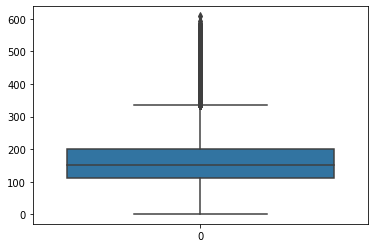

In [ ]:
sns.boxplot(data = DataModelos['bookings'])

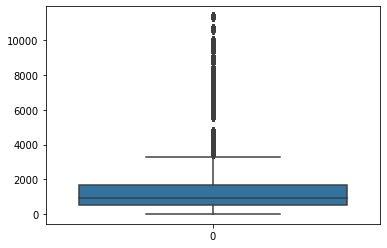

In [ ]:
sns.boxplot(data = DataModelos['distance'])

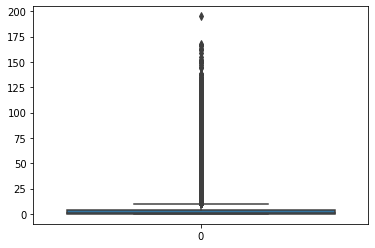

In [ ]:
sns.boxplot(data = DataModelos['pax_high'])

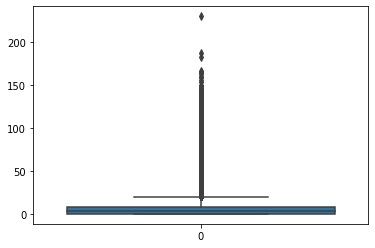

In [ ]:
sns.boxplot(data = DataModelos['pax_midhigh'])

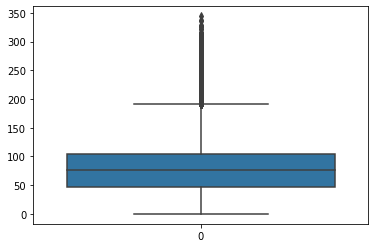

In [ ]:
sns.boxplot(data = DataModelos['pax_midlow'])

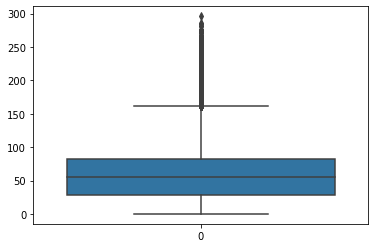

In [ ]:
sns.boxplot(data = DataModelos['pax_low'])

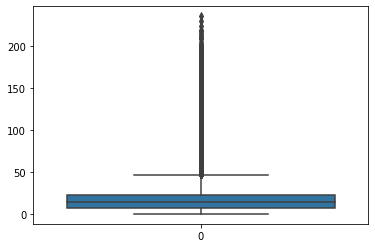

In [ ]:
sns.boxplot(data = DataModelos['pax_freqflyer'])

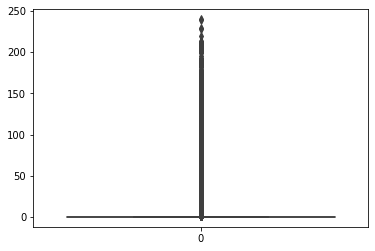

In [ ]:
sns.boxplot(data = DataModelos['group_bookings'])

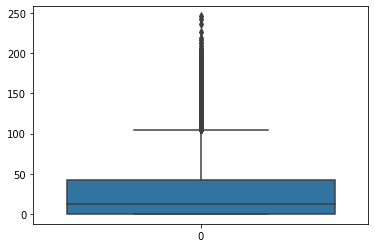

In [ ]:
sns.boxplot(data = DataModelos['dom_cnx'])

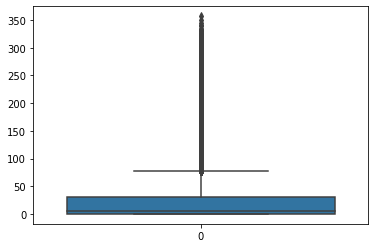

In [ ]:
sns.boxplot(data = DataModelos['int_cnx'])

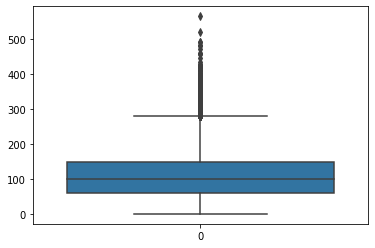

In [ ]:
sns.boxplot(data = DataModelos['p2p'])

# Modelo de clasificación (2.5 pts)


## Regresión logística:

In [ ]:
#Crearemos unas listas para guardar los valores de accuracy, precision, recall y F1_score de cada iteracion
l_accuracy_regresion = []
l_presicion1_regresion = []
l_recall1_regresion = []
l_F_score1_regresion = []
l_presicion0_regresion = []
l_recall0_regresion = []
l_F_score0_regresion = []

In [ ]:
kf = KFold(n_splits=10,shuffle=False) #Realizamos un 10-fold cross validation
print(kf)
#Generando los k-fold
temp = kf.split(DataModelos)
for train_index, test_index in temp:
    train_index_list = list(train_index)
    test_index_list = list(test_index)
    X_train = DataModelos.iloc[train_index_list,0:11]
    y_train = DataModelos.iloc[train_index_list,11]
    X_test = DataModelos.iloc[test_index_list,0:11]
    y_test = DataModelos.iloc[test_index_list,11]
    LR = LogisticRegression(max_iter = 200)
    LR = LR.fit(X_train,y_train)
    #Aplicando el modelo a otros datos
    resultado = LR.predict(X_test)
    #Analizando los parámetros aprendidos
    accuracy = sum(LR.predict(X_test) == y_test)/len(y_test)
    l_accuracy_regresion.append(accuracy) #Agregamos los valores a la lista de accuracy
    cm = confusion_matrix(y_test, resultado) 
    #Creamos la matriz 1
    TN1 = cm[0][0] 
    FP1 = cm[0][1]
    FN1 = cm[1][0] 
    TP1 = cm[1][1]
#Calculamos y guardamos las métricas en las listas
    presicion1 = TP1/(TP1 + FP1)
    recall1 = TP1/(TP1 + FN1)
    F_score1 = 2*TP1/(2*TP1 + FP1 + FN1)
    l_presicion1_regresion.append(presicion1)
    l_recall1_regresion.append(recall1)
    l_F_score1_regresion.append(F_score1)
#Creamos la matriz 0
    TN0 = cm[1][1]
    FP0 = cm[1][0]
    FN0 = cm[0][1]
    TP0 = cm[0][0]
#Calculamos y guardamos las métricas en las listas
    presicion0 = TP0/(TP0 + FP0)
    recall0 = TP0/(TP0 + FN0)
    F_score0 = 2*TP0/(2*TP0 + FP0 + FN0)
    l_presicion0_regresion.append(presicion0)
    l_recall0_regresion.append(recall0)
    l_F_score0_regresion.append(F_score0)

KFold(n_splits=10, random_state=None, shuffle=False)


In [ ]:
print('Accuracy:')
print(l_accuracy_regresion)
print('')
print('Precision 1:')
print(l_presicion1_regresion)
print('Precision 0:')
print(l_presicion0_regresion)
print('')
print('Recall 1:')
print(l_recall1_regresion)
print('Recall 0:')
print(l_recall0_regresion)
print('')
print('F_score 1:')
print(l_F_score1_regresion)
print('F_score 0:')
print(l_F_score0_regresion)

Accuracy:
[0.6584608605079721, 0.6584207996154154, 0.6560838082265866, 0.6597694472542991, 0.6570753252476289, 0.6547217242380843, 0.6593488036696145, 0.6579767043576672, 0.6563341913127084, 0.6568650034552865]

Precision 1:
[0.6639641606120137, 0.6630847094769442, 0.6609131461012966, 0.6649352268359322, 0.6618827561140246, 0.6600253332779601, 0.6643562298659462, 0.6624996106363759, 0.6610972568578554, 0.6609912584871577]
Precision 0:
[0.5130458665201868, 0.5346206896551724, 0.5296679368535656, 0.5211817168338907, 0.5267454954954955, 0.5100538091192297, 0.5261266242742605, 0.5347850678733032, 0.529248683116163, 0.544113475177305]

Recall 1:
[0.9729935568384336, 0.9742407353682185, 0.9735334660744371, 0.9738603858560039, 0.9743033156518948, 0.9735072969786067, 0.9738898621372534, 0.9748666941681563, 0.9740056948654359, 0.9753810800459594]
Recall 0:
[0.05462467467906541, 0.056407718951014346, 0.056312758630668175, 0.05480174662251267, 0.05434214347952367, 0.05213338736756788, 0.055640021

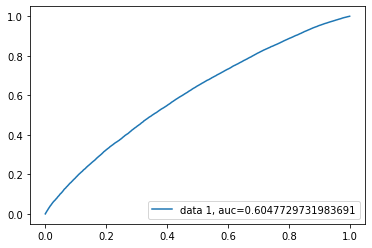

In [ ]:
y_pred_proba = LR.predict_proba(X_test)[::,1]
fpr, tpr, _ = mt.roc_curve(y_test,  y_pred_proba)
auc1 = mt.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc1))
plt.legend(loc=4)
plt.show()

## Naive Bayes:

In [ ]:
#Volvemos a realizar los mismos pasos pero utilizando el modelo de Naive Bayes
l_accuracy_naive = []
l_presicion1_naive = []
l_recall1_naive = []
l_F_score1_naive = []
l_presicion0_naive = []
l_recall0_naive = []
l_F_score0_naive = []

In [ ]:
kf = KFold(n_splits=10,shuffle=False) #Realizamos un 10-fold cross validation
print(kf)
#Generando los k-fold
temp = kf.split(DataModelos)
for train_index, test_index in temp:
    train_index_list = list(train_index)
    test_index_list = list(test_index)   
    X_train = DataModelos.iloc[train_index_list,0:11]
    y_train = DataModelos.iloc[train_index_list,11]
    X_test = DataModelos.iloc[test_index_list,0:11]
    y_test = DataModelos.iloc[test_index_list,11]
    NB = GaussianNB()
    NB = NB.fit(X_train,y_train)
    #Aplicando el modelo a otros datos
    resultadoNB = NB.predict(X_test)
    print("Resultado de la predicción:\n",resultado)
    print("Resultado original:\n",y_test)
    accuracy = sum(resultadoNB == y_test)/len(y_test)
    l_accuracy_naive.append(accuracy) #Agregamos los valores a la lista de accuracy
    cm = confusion_matrix(y_test, resultadoNB)
    #Creamos la matriz 1
    TN1 = cm[0][0] 
    FP1 = cm[0][1]
    FN1 = cm[1][0] 
    TP1 = cm[1][1]
#Calculamos y guardamos las métricas en las listas
    presicion1 = TP1/(TP1 + FP1)
    recall1 = TP1/(TP1 + FN1)
    F_score1 = 2*TP1/(2*TP1 + FP1 + FN1)
    l_presicion1_naive.append(presicion1)
    l_recall1_naive.append(recall1)
    l_F_score1_naive.append(F_score1)
#Creamos la matriz 0
    TN0 = cm[1][1]
    FP0 = cm[1][0]
    FN0 = cm[0][1]
    TP0 = cm[0][0]
#Calculamos y guardamos las métricas en las listas
    presicion0 = TP0/(TP0 + FP0)
    recall0 = TP0/(TP0 + FN0)
    F_score0 = 2*TP0/(2*TP0 + FP0 + FN0)
    l_presicion0_naive.append(presicion0)
    l_recall0_naive.append(recall0)
    l_F_score0_naive.append(F_score0)

KFold(n_splits=10, random_state=None, shuffle=False)
Resultado de la predicción:
 [0. 1. 0. ... 1. 1. 1.]
Resultado original:
 0        1.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
99994    0.0
99995    1.0
99996    1.0
99997    0.0
99998    1.0
Name: no_show, Length: 99848, dtype: float64
Resultado de la predicción:
 [0. 1. 0. ... 1. 1. 1.]
Resultado original:
 99999     1.0
100000    0.0
100001    1.0
100002    1.0
100003    0.0
         ... 
199982    0.0
199983    1.0
199984    1.0
199985    1.0
199986    1.0
Name: no_show, Length: 99848, dtype: float64
Resultado de la predicción:
 [0. 1. 0. ... 1. 1. 1.]
Resultado original:
 199987    1.0
199988    1.0
199989    0.0
199990    0.0
199991    1.0
         ... 
299968    0.0
299969    1.0
299970    1.0
299971    0.0
299972    0.0
Name: no_show, Length: 99847, dtype: float64
Resultado de la predicción:
 [0. 1. 0. ... 1. 1. 1.]
Resultado original:
 299973    1.0
299974    1.0
299975    1.0
299976    1.0
299977   

In [ ]:
print('Accuracy:')
print(l_accuracy_naive)
print('')
print('Precision 1:')
print(l_presicion1_naive)
print('Precision 0:')
print(l_presicion0_naive)
print('')
print('Recall 1:')
print(l_recall1_naive)
print('Recall 0:')
print(l_recall0_naive)
print('')
print('F_score 1:')
print(l_F_score1_naive)
print('F_score 0:')
print(l_F_score0_naive)

Accuracy:
[0.6464325775178271, 0.6469233234516465, 0.6453173355233507, 0.647080032449648, 0.6456378258735865, 0.6427233667511292, 0.6472402776247659, 0.6465091590132903, 0.6463689444850621, 0.6453573968171302]

Precision 1:
[0.6726397706328077, 0.6719124887711359, 0.6701327987972939, 0.6735986151288067, 0.6707251912736036, 0.6680315782309839, 0.6735897933332573, 0.6714929141739269, 0.6703522493784836, 0.6701185959875594]
Precision 0:
[0.45373933411410405, 0.4623267534649307, 0.4644250726442507, 0.45369985881571295, 0.4599461460787614, 0.4517757809157039, 0.45825830741528895, 0.4623060796645702, 0.4666553249404559, 0.46528583264291634]

Recall 1:
[0.9005346453214726, 0.9022613794261807, 0.90119466993414, 0.8999147952041872, 0.9018909457786203, 0.9019004303150029, 0.8991697768299185, 0.9020335823746009, 0.9040139616055847, 0.9011260053619303]
Recall 0:
[0.15861040442144048, 0.16020025031289112, 0.16187747779031744, 0.1600972950795651, 0.15875689805402265, 0.1528107450934985, 0.1637038769

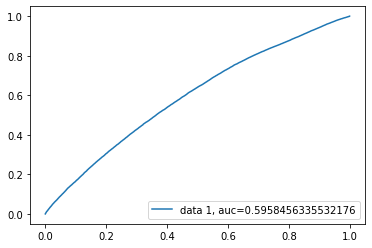

In [ ]:
z_pred_proba = NB.predict_proba(X_test)[::,1]
fpr, tpr, _ = mt.roc_curve(y_test,  z_pred_proba)
auc1 = mt.roc_auc_score(y_test, z_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc1))
plt.legend(loc=4)
plt.show()

## Árbol de Decisión:

In [ ]:
l_accuracy_arbol = []
l_presicion1_arbol = []
l_recall1_arbol = []
l_F_score1_arbol = []
l_presicion0_arbol = []
l_recall0_arbol = []
l_F_score0_arbol = []

In [ ]:
kf = KFold(n_splits=10,shuffle=False) #Realizamos un 10-fold cross validation
print(kf)
#Generando los k-fold
temp = kf.split(DataModelos)
for train_index, test_index in temp:
    train_index_list = list(train_index)
    test_index_list = list(test_index)
    X_train = DataModelos.iloc[train_index_list,0:11]
    y_train = DataModelos.iloc[train_index_list,11]
    X_test = DataModelos.iloc[test_index_list,0:11]
    y_test = DataModelos.iloc[test_index_list,11]
    AD = DecisionTreeClassifier(max_depth=20)
    AD = AD.fit(X_train,y_train)
    #Aplicando el modelo a otros datos
    resultado = AD.predict(X_test)
    print("Resultado de la predicción:\n",resultado)
    print("Resultado original:\n",y_test)
    accuracy = sum(AD.predict(X_test)==y_test)/len(y_test)
    l_accuracy_arbol.append(accuracy) #Agregamos los valores a la lista de accuracy
    cm = confusion_matrix(y_test, resultado)
    #Creamos la matriz 1
    TN1 = cm[0][0] 
    FP1 = cm[0][1]
    FN1 = cm[1][0] 
    TP1 = cm[1][1]
#Calculamos y guardamos las métricas en las listas
    presicion1 = TP1/(TP1 + FP1)
    recall1 = TP1/(TP1 + FN1)
    F_score1 = 2*TP1/(2*TP1 + FP1 + FN1)
    l_presicion1_arbol.append(presicion1)
    l_recall1_arbol.append(recall1)
    l_F_score1_arbol.append(F_score1)
#Creamos la matriz 0
    TN0 = cm[1][1]
    FP0 = cm[1][0]
    FN0 = cm[0][1]
    TP0 = cm[0][0]
#Calculamos y guardamos las métricas en las listas
    presicion0 = TP0/(TP0 + FP0)
    recall0 = TP0/(TP0 + FN0)
    F_score0 = 2*TP0/(2*TP0 + FP0 + FN0)
    l_presicion0_arbol.append(presicion0)
    l_recall0_arbol.append(recall0)
    l_F_score0_arbol.append(F_score0)

KFold(n_splits=10, random_state=None, shuffle=False)
Resultado de la predicción:
 [1. 1. 1. ... 1. 1. 0.]
Resultado original:
 0        1.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
99994    0.0
99995    1.0
99996    1.0
99997    0.0
99998    1.0
Name: no_show, Length: 99848, dtype: float64
Resultado de la predicción:
 [0. 1. 1. ... 1. 1. 1.]
Resultado original:
 99999     1.0
100000    0.0
100001    1.0
100002    1.0
100003    0.0
         ... 
199982    0.0
199983    1.0
199984    1.0
199985    1.0
199986    1.0
Name: no_show, Length: 99848, dtype: float64
Resultado de la predicción:
 [1. 1. 1. ... 1. 1. 0.]
Resultado original:
 199987    1.0
199988    1.0
199989    0.0
199990    0.0
199991    1.0
         ... 
299968    0.0
299969    1.0
299970    1.0
299971    0.0
299972    0.0
Name: no_show, Length: 99847, dtype: float64
Resultado de la predicción:
 [1. 1. 1. ... 1. 1. 1.]
Resultado original:
 299973    1.0
299974    1.0
299975    1.0
299976    1.0
299977   

In [ ]:
print('Accuracy:')
print(l_accuracy_arbol)
print('')
print('Precision 1:')
print(l_presicion1_arbol)
print('Precision 0:')
print(l_presicion0_arbol)
print('')
print('Recall 1:')
print(l_recall1_arbol)
print('Recall 0:')
print(l_recall0_arbol)
print('')
print('F_score 1:')
print(l_F_score1_arbol)
print('F_score 0:')
print(l_F_score0_arbol)

Accuracy:
[0.6584808909542504, 0.654484816921721, 0.6564643905174917, 0.659158512524162, 0.6539204983624947, 0.6574659228619788, 0.6575560607729827, 0.6546315863270804, 0.6546516169739702, 0.6585976544112492]

Precision 1:
[0.7067806163243371, 0.7009336099585062, 0.7025398360805741, 0.7066941458833351, 0.7015438064886892, 0.7015658621315428, 0.7046575485079968, 0.7032035381970418, 0.7013580569339253, 0.7037913143484454]
Precision 0:
[0.5020588360147726, 0.49687609996480114, 0.50548273794226, 0.5019626450416254, 0.4973156380191556, 0.5075987841945289, 0.5002173535037385, 0.4981395348837209, 0.5009240555292904, 0.5103729104157737]

Recall 1:
[0.8213279310292303, 0.8253958559191339, 0.8231735334660745, 0.8243259692045524, 0.8210862619808307, 0.8288234483392292, 0.8248609947444588, 0.8186582328765031, 0.8222344692446649, 0.8250019149751053]
Recall 0:
[0.3458490510863526, 0.3286957534126961, 0.34149376392626674, 0.3410309761744278, 0.3363055474876561, 0.33355525965379496, 0.3364423133150108

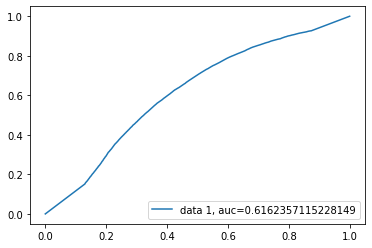

In [ ]:
a_pred_proba = AD.predict_proba(X_test)[::,1]
fpr, tpr, _ = mt.roc_curve(y_test,  a_pred_proba)
auc1 = mt.roc_auc_score(y_test, a_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc1))
plt.legend(loc=4)
plt.show()

# Selección del modelo final (1 pto)

Usamos K-folds CV para ver el rendimiento de los modelos, luego de generar 10 iteraciones, calculamos la media y la desviación estandar para cada métrica correspondiente.

Realizamos esto para una matriz 0:


    TN0 = cm[1][1]
    FP0 = cm[1][0]
    FN0 = cm[0][1]
    TP0 = cm[0][0]

Y para una matriz 1:


    TN1 = cm[0][0] 
    FP1 = cm[0][1]
    FN1 = cm[1][0] 
    TP1 = cm[1][1]

In [ ]:
lrp0=round(statistics.mean(l_presicion0_regresion),2)
nbp0=round(statistics.mean(l_presicion0_naive),2)
adp0=round(statistics.mean(l_presicion0_arbol),2)
lrpd0=round(statistics.pstdev(l_presicion0_regresion),5)
nbpd0=round(statistics.pstdev(l_presicion0_naive),5)
adpd0=round(statistics.pstdev(l_presicion0_arbol),5)
lrr0=round(statistics.mean(l_recall0_regresion),2)
nbr0=round(statistics.mean(l_recall0_naive),2)
adr0=round(statistics.mean(l_recall0_arbol),2)
lrrd0=round(statistics.pstdev(l_recall0_regresion),5)
nbrd0=round(statistics.pstdev(l_recall0_naive),5)
adrd0=round(statistics.pstdev(l_recall0_arbol),5)
lrf0=float(round(statistics.mean(l_F_score0_regresion),2))
nbf0=float(round(statistics.mean(l_F_score0_naive),2))
adf0=float(round(statistics.mean(l_F_score0_arbol),2))
lrfd0=round(statistics.pstdev(l_F_score0_regresion),5)
nbfd0=round(statistics.pstdev(l_F_score0_naive),5)
adfd0=round(statistics.pstdev(l_F_score0_arbol),5)

In [ ]:
lrp=round(statistics.mean(l_presicion1_regresion),2)
nbp=round(statistics.mean(l_presicion1_naive),2)
adp=round(statistics.mean(l_presicion1_arbol),2)
lrpd=round(statistics.pstdev(l_presicion1_regresion),5)
nbpd=round(statistics.pstdev(l_presicion1_naive),5)
adpd=round(statistics.pstdev(l_presicion1_arbol),5)
lrr=round(statistics.mean(l_recall1_regresion),2)
nbr=round(statistics.mean(l_recall1_naive),2)
adr=round(statistics.mean(l_recall1_arbol),2)
lrrd=round(statistics.pstdev(l_recall1_regresion),5)
nbrd=round(statistics.pstdev(l_recall1_naive),5)
adrd=round(statistics.pstdev(l_recall1_arbol),5)
lrf=float(round(statistics.mean(l_F_score1_regresion),2))
nbf=float(round(statistics.mean(l_F_score1_naive),2))
adf=float(round(statistics.mean(l_F_score1_arbol),2))
lrfd=round(statistics.pstdev(l_F_score1_regresion),5)
nbfd=round(statistics.pstdev(l_F_score1_naive),5)
adfd=round(statistics.pstdev(l_F_score1_arbol),5)
lra=round(statistics.mean(l_accuracy_regresion),2)
nba=round(statistics.mean(l_accuracy_naive),2)
ada=round(statistics.mean(l_accuracy_arbol),2)
auc1=round(auc1,5)
auc2=round(auc2,5)
auc3=round(auc3,5)

Ahora veremos los resultados para cada matriz

In [ ]:
fig = go.Figure(data=[go.Table( 
    header=dict(values=['', "Precision Media", "Precision Dstd","Recall Media", "Recall Dstd","F1_score Media","F1_score Dstd"]), 
    cells=dict(values=[['Regresión logística', "Naive Bayes","Árbol de Decisión"],
                       [lrp0,nbp0,adp0],
                       [lrpd0,nbpd0,adpd0],
                       [lrr0,nbr0,adr0],
                       [lrrd0,nbrd0,adrd0],
                       [lrf0,nbf0,adf0],
                       [lrfd0,nbfd0,adfd0],
                      ])) 
]) 
print("Para la matriz 0: ")
fig.show() 

Para la matriz 0: 


In [ ]:
fig = go.Figure(data=[go.Table( 
    header=dict(values=['', "Precision Media", "Precision Dstd","Recall Media", "Recall Dstd","F1_score Media","F1_score Dstd", "Accuracy","AUC"]), 
    cells=dict(values=[['Regresión logística', "Naive Bayes","Árbol de Decisión"],
                       [lrp,nbp,adp],
                       [lrpd,nbpd,adpd],
                       [lrr,nbr,adr],
                       [lrrd,nbrd,adrd],
                       [lrf,nbf,adf],
                       [lrfd,nbfd,adfd],
                       [lra,nba,ada],
                       [auc1,auc2,auc3]])) 
]) 
print("Para la matriz 1: ")
fig.show() 

Para la matriz 1: 


Según lo que podemos observar en la tabla, decidimos seleccionar el modelo de árbol de decisión debido a que este selecciona las mejores variables/atributos para la predicción, además de que separa los puntos según la variable. En adicción a esto, tenemos el beneficio de que al no tener problemas con los datos atípicos no tiene un sesgo con los datos, esto se puede apreciar en la tabla, específicamente en las columnas de media, lo que nos indica la clase positiva para cada caso. Si bien el modelo de regresión logística tiene un F1_score y un acurracy más alto que los otros,notamos que tiene un sesgo con los datos ya que, la matriz muestra una precisión de 66% y un recall de 97%, es decir, que solo esta identificando la clase noshow igual a 1, la cual indica que la persona no llego a subirse al avión.

# Evaluación de la segunda base de datos basado en la variable binaria no-show (1.5 pts)

In [ ]:
vuelos2 = pd.read_csv("ALUMNOS-evalData.csv")

In [ ]:
Dataeval = vuelos2[["bookings", "distance", "pax_high", "pax_midhigh",
                     "pax_midlow", "pax_low", "pax_freqflyer", "group_bookings",
                    "dom_cnx", "int_cnx", "p2p"]]

In [ ]:
Dataeval

,bookings,distance,pax_high,pax_midhigh,pax_midlow,pax_low,pax_freqflyer,group_bookings,dom_cnx,int_cnx,p2p
0,232,989,2,0,143,82,5,5,53,0,179
1,126,849,0,2,62,62,0,0,0,0,126
2,284,3464,6,0,136,113,29,0,0,138,146
3,76,1125,0,0,32,26,18,0,1,0,75
4,76,375,0,0,35,30,11,0,5,0,71
...,...,...,...,...,...,...,...,...,...,...,...
248875,63,366,1,4,52,0,6,0,17,0,46
248876,325,9520,3,3,159,136,24,0,0,136,189
248877,47,1008,1,0,4,10,32,0,6,4,37
248878,210,2696,3,5,82,63,57,1,59,11,140


In [ ]:
probModeloLRnuevo=AD.predict(Dataeval) #Predecimos los nuevos datos
print("Resultado de la predicción:\n",probModeloLRnuevo) #Imprimimos los valores predichos

Resultado de la predicción:
 [1. 1. 1. ... 1. 1. 0.]


In [ ]:
df_no_show0 = {'no_show': probModeloLRnuevo}
df_no_show= pd.DataFrame(df_no_show0)

In [ ]:
x=0
for i in range(0,248880):
  if df_no_show["no_show"].iloc[i]==1.0:
    x=x+1
print(x)
#Vemos cuántos no show hay predichos en nuestra nueva base de datos

190636


In [ ]:
porcentajenoshoweval=x/248880
porcentajenoshoweval
#Calculamos el porcentaje de no show / total de datos

0.7659755705560913

In [ ]:
df_no_show.to_csv("columna_no_show.csv") #Descargar csv con la columna solicitada